# Classification Problem

In [4]:
# to deactivate warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 1. Loading and Preprocessing

### Importing Libaries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PowerTransformer  
data = load_breast_cancer()
df =pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preprocessing

In [10]:
# Add the target column to the DataFrame  
df['target'] = data.target  

In [12]:
# Check basic information about the dataset  
print("Dataset Shape:", df.shape)  
print("First few rows of the dataset:\n", df.head())  
print("Data types:\n", df.dtypes)  

Dataset Shape: (569, 31)
First few rows of the dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wor

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Finding the missing values

In [16]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


* There is no missing values in the dataset

### Finding Duplicates

In [18]:
# Checking the total number of duplicates
df.duplicated().sum()

0

* There is no duplicated rows in the dataset

### Check Skewness

In [20]:
# Check skewness of each feature  
skewness = df.drop('target', axis=1).skew()  
skewed_features = skewness[skewness > 1].index  # Identify skewed features
skewness

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

#### Interpretation of the above  Skewness Output
1. Positively Skewed Features : Features like mean area (1.645732), mean compactness (1.190123), concavity error (5.110463), and area error (5.447186) show strong positive skewness. This indicates that their distributions have long right tails, suggesting the presence of a small number of higher values. This can signal the need for potential transformations to normalize the distribution for analysis or modeling.
2. Moderately Skewed Features : Features such as mean radius (0.942380), mean perimeter (0.990650), worst radius (1.103115), and others fall into the moderately positive skewed category, indicating that while they may not require drastic transformations, they are also not perfectly normal.
3. Negatively Skewed Features : Features like mean smoothness (0.456324) and worst texture (0.498321) have relatively low skewness, which indicates that their distributions are closer to normal. These features might not require significant adjustments for modeling purposes.s

### Handling Skewness

In [22]:
# Log transformation to skewed features  
for feature in skewed_features:  
    if (df[feature] <= 0).any():  
        df[feature] = np.log1p(df[feature])  # log1p to handle zero values  
    else:  
        df[feature] = np.log(df[feature])  

In [24]:
skewness = df.drop('target', axis=1).skew()  
skewed_features = skewness[skewness > 1].index  # Identify skewed features
skewness

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  0.284957
mean smoothness            0.456324
mean compactness          -0.034086
mean concavity             1.206982
mean concave points        1.083180
mean symmetry              0.725609
mean fractal dimension     0.853573
radius error               0.572974
texture error              0.029191
perimeter error            0.637943
area error                 0.797609
smoothness error           0.404364
compactness error         -0.004041
concavity error            4.231738
concave points error       1.399869
symmetry error             0.689416
fractal dimension error    0.530075
worst radius               0.470241
worst texture              0.498321
worst perimeter            0.456671
worst area                 0.455914
worst smoothness           0.415426
worst compactness         -0.221844
worst concavity            0.717939
worst concave points       0

In [26]:
# Prepare data for modeling  
X = df.drop('target', axis=1)  # Features  
y = df['target']  # Target variable  

In [28]:
# Split into training and test sets  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

In [30]:
from sklearn.preprocessing import StandardScaler  

# Separate features and target  
X = df.drop('target', axis=1)  
y = df['target']  

# Standardization of features  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [32]:
# Now, X_train_scaled and X_test_scaled are ready for model training  
print("Standardization complete. Training and test data prepared successfully.")  

Standardization complete. Training and test data prepared successfully.


### Explanation of Preprocessing Steps and Justification
 1. Loading the Data: The first step is loading the dataset into a DataFrame. This allows for easy manipulation and exploration of the data.
 2. Check for Missing Values: It's crucial to identify any missing values, as they can impact the performance of machine learning algorithms. Handling missing values ensures the model trains on complete data.
 3. Handling Missing Values: In this dataset, there are no missing values. 
 4. Handling Duplicates: In this dataset, there are no duplicated rows. 
 5. Feature Scaling: Standardizing features ensures that they all contribute equally to the model training process. This is particularly important for algorithms like k-NN and SVM, which rely on distance calculations.l.ons.




# 2. Classification Algorithm Implementation (5 marks)
Implement the following five classification algorithms:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)

## 1. Logistic Regression
Logistic Regression is a statistical method used for predicting categorical outcomes. It is a supervised learning algorithm that is closely related to linear regression but adapted for binary or multi-class classification problems.

In [34]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  

In [36]:
# Split into train/test sets  
X = df.drop('target', axis=1)  # Features  
y = df['target']  # Target variable  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 

In [38]:
# Training the data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred_logistic = logistic_model.predict(X_test)  
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)  

In [42]:
y_pred_logistic

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [44]:
accuracy_logistic

0.9912280701754386

### Evaluating the model

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [48]:
# Calculate the accuracy  
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)  

# Calculate precision  
precision_logistic = precision_score(y_test, y_pred_logistic)  

# Calculate recall  
recall_logistic= recall_score(y_test, y_pred_logistic)  

# Calculate confusion matrix  
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)  

In [56]:
# Print results  
print(f"Accuracy: {accuracy_logistic:.4f}")  
print(f"Precision: {precision_logistic:.4f}")  
print(f"Recall: {recall_logistic:.4f}")  
print("Confusion Matrix:\n", conf_matrix_logistic)
print("Classification Report:",classification_report(y_test, y_pred_logistic))  

Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
Confusion Matrix:
 [[42  1]
 [ 0 71]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



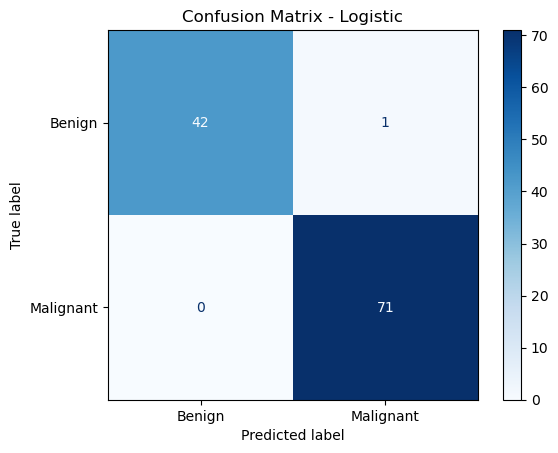

In [72]:
disp_logistic= ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic, display_labels=['Benign', 'Malignant'])  
disp_logistic.plot(cmap='Blues')  
plt.title("Confusion Matrix - Logistic")  
plt.show()  

## Overview of Metrics
 #### 1.  Accuracy: 
Value: 0.9912 (or 99.12%)
Interpretation: This indicates that about 99.12% of all predictions made by the model were correct. Such a high accuracy score suggests that the model is performing very well overall.
 #### 2. Precision: 

Value: 0.9861 (or 98.61
)
Interpretation: Precision is the ratio of true positive predictions to the total predicted positives (true positives + false positives). High precision indicates that when the model predicts a tumor is malignant (1), it is very likely to be correct. In this case, the model has a low false positive ra
 #### 3. Recall:

Value: 1.0 (or 100
)
Interpretation: Recall (also known as sensitivity) is the ratio of true positive predictions to the total actual positives (true positives + false negatives). A recall of 1.0 means that the model correctly identified all actual malignant tumors, leading to no false negatives. This is especially critical in medical diagnostics, where failing to identify a malignant tumor can have serious consequenc
#### Confusion Matrix:
Interpretation:
   * True Negatives (TN): 42 (correctly predicted benign tumors)
   * False Positives (FP): 1 (one benign tumor incorrectly predicted as malignant)
   * False Negatives (FN): 0 (no malignant tumors were missed)
   * True Positives (TP): 71 (correctly predicted malignant tumors)nt tumors)s.te.
ll.

## 2. Decision Tree Classifier
 It is a flowchart-like tree structure where each internal node denotes the feature, branches denotes the rules and the leaf denotes the result of the algorithms.es.

In [62]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [64]:
# Initialize the Decision Tree Classifier  
decision_tree_model = DecisionTreeClassifier(random_state=42)  
# Train the model  
decision_tree_model.fit(X_train, y_train)  
# Make predictions  
y_pred_tree = decision_tree_model.predict(X_test)

#### Evaluating the model

In [66]:
# Calculate the accuracy  
accuracy_tree = accuracy_score(y_test, y_pred_tree)  

# Calculate precision  
precision_tree = precision_score(y_test, y_pred_tree)  

# Calculate recall  
recall_tree = recall_score(y_test, y_pred_tree)  

# Calculate confusion matrix  
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)  

In [68]:
# Print results  
print(f"Accuracy: {accuracy_tree:.4f}")  
print(f"Precision: {precision_tree:.4f}")  
print(f"Recall: {recall_tree:.4f}")  
print("Confusion Matrix:\n", conf_matrix_tree)
print(classification_report(y_test, y_pred_tree))  

Accuracy: 0.9474
Precision: 0.9577
Recall: 0.9577
Confusion Matrix:
 [[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



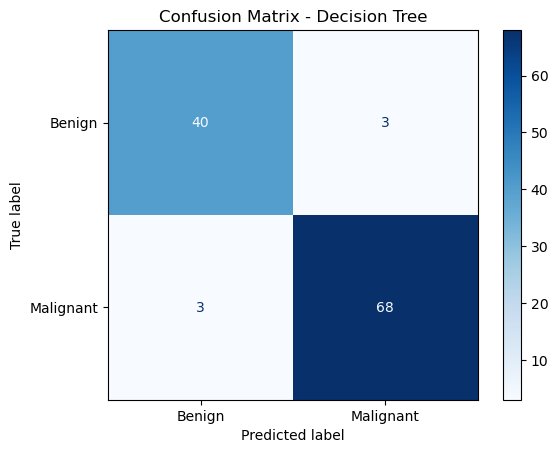

In [70]:
# Visualize the confusion matrix  
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=['Benign', 'Malignant'])  
disp_tree.plot(cmap='Blues')  
plt.title("Confusion Matrix - Decision Tree")  
plt.show()  

### Overview of Metrics

#### Accuracy
Value: 0.9474 (or 94.74%)
Interpretation: This means approximately 94.74% of the predictions made by the model were correct. While not as high as logistic regression model, it still reflects strong performance malignant tumors)

#### 2. Precision
Value: 0.9577 (or 95.77%)
Interpretation: This indicates that when the model predicts a tumur is malignant (1), about 95.77% of those predictions are actually correct. It shows that the model has a low false positive rate.


#### 3. Recall
Value: 0.9577 (or 95.77%)
Interpretation: The model correctly identifies 95.77% of the actual malignant tumors, meaning there are very few false negatives. This is critical in medical scenarios to avoid missing malignant cases.

#### 4. Confusion Matrix
[[40  3]  
 [ 3 68]
* True Negatives (TN): 40 (correctly predicted benign tumors)
* 
False Positives (FP): 3 (benign tumors incorrectly predicted as malignant
* 
False Negatives (FN): 3 (malignant tumors that were misse
* )
True Positives (TP): 68 (correctly predicted malignant tumors)]

## 3. Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [76]:
# Initialize the Decision Tree Classifier  
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
# Train the model  
random_forest_model.fit(X_train, y_train)  
# Make predictions  
y_pred_rf = random_forest_model.predict(X_test)

### Evaluating the model

In [117]:
# Calculate the accuracy  
accuracy_rf = accuracy_score(y_test, y_pred_rf)  

# Calculate precision  
precision_rf = precision_score(y_test, y_pred_rf)  

# Calculate recall  
recall_rf = recall_score(y_test, y_pred_rf)  

# Calculate confusion matrix  
conf_matrix_rf= confusion_matrix(y_test, y_pred_rf)  

# Classification Report
classification_report_rf = classification_report(y_test, y_pred_rf)

In [119]:
# Print results  
print(f"Accuracy: {accuracy_rf:.4f}")  
print(f"Precision: {precision_rf:.4f}")  
print(f"Recall: {recall_rf:.4f}")  
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report",classification_report(y_test, y_pred_rf))  

Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



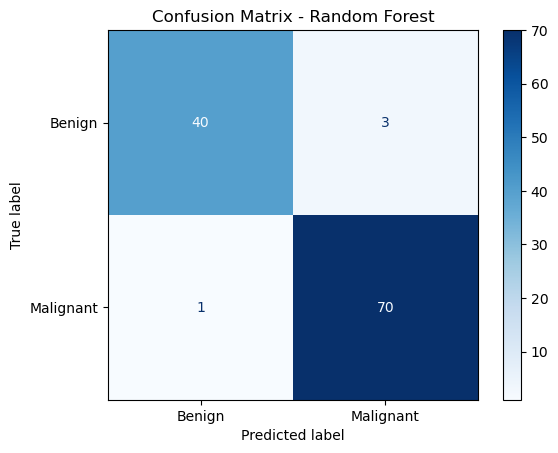

In [84]:
# Visualize the confusion matrix  
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Benign', 'Malignant'])  
disp_rf.plot(cmap='Blues')  
plt.title("Confusion Matrix - Random Forest")  
plt.show()  

### Overview of Metrics

#### 1. Accuracy:
Value: 0.9649 (or 96.49%)

Interpretation: This means that approximately 96.49% of the predictions made by the model are correct, indicating strong overall performance.

#### 2. Precision:
Value: 0.9589 (or 95.89%)

Interpretation: This indicates that when the model predicts a tumor is malignant (1), about 95.89% of those predictions are actually correct. This is a good precision rate, suggesting a low false positive rate.

#### 3. Recall
Value: 0.9859 (or 98.59%)

Interpretation: The model successfully identifies 98.59% of actual malignant tumors. This high recall means that the model very rarely misses malignant cases (low false negatives), which is critical in medical applications to ensure patient safety.


#### 4. Confusion Matrix
[[40  3]  
 [ 1 70
 * True Negatives (TN): 40 (correctly predicted benign)
 * False Positives (FP): 3 (benign incorrectly predicted as malignant)
 * False Negatives (FN): 1 (malignant incorrectly predicted as benign)
 * True Positives (TP): 70 (correctly predicted malignantants)]

## 4. Support Vector Machine (SVM)

In [109]:
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report  
# Initialize and fit the Support Vector Machine classifier  
svm_classifier = SVC()  
svm_classifier.fit(X_train, y_train) 

SVC()

In [93]:
# Predictions using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

### Evaluating the model

In [113]:
# Calculate the accuracy  
svm_accuracy = accuracy_score(y_test, y_pred_svm)  

# Calculate precision  
svm_precision = precision_score(y_test, y_pred_svm)  

# Calculate recall  
svm_recall = recall_score(y_test, y_pred_svm)  

# Calculate confusion matrix  
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm) 

# Classifiaction report
svm_classification_report = classification_report(y_test, y_pred_svm)

In [115]:
# Display the results  
print(f"SVM Classifier Accuracy: {svm_accuracy:.4f}")  
print(f"SVM Classifier Precision: {svm_precision:.4f}")  
print(f"SVM Classifier Recall: {svm_recall:.4f}")  
print("SVM Classifier Confusion Matrix:\n", svm_conf_matrix)  
print("SVM Classifier Classification Report:\n", svm_classification_report)

SVM Classifier Accuracy: 0.9825
SVM Classifier Precision: 0.9726
SVM Classifier Recall: 1.0000
SVM Classifier Confusion Matrix:
 [[41  2]
 [ 0 71]]
SVM Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



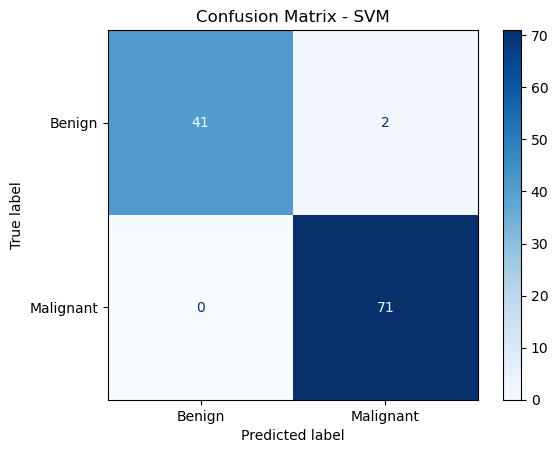

In [124]:
# Visualize the confusion matrix  
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=['Benign', 'Malignant'])  
disp_svm.plot(cmap='Blues')  
plt.title("Confusion Matrix - SVM")  
plt.show()  

## Overview of Metrics

### 1. Accuracy: 0.9825
This indicates that approximately 98.25% of the predictions made by the SVM model are correct. This is an excellent result, suggesting the model performs very well overall.

### 2. Precision: 0.9726

For class 1 (malignant), this means that among the instances classified as malignant, approximately 97.26% were actually malignant. This high precision indicates a low false positive rate, making the model reliable in not misclassifying benign instances as malignant.

### 3. Recall: 1.0000

The model successfully identified 100% of the actual malignant cases. This perfect recall means there are no false negatives, which is critical in medical contexts where missing a cancer diagnosis can have serious consequences.

### 4. Confusion Matrix
The confusion matrix you provided
l[[41  2]  
 [ 0 71]

  * True Negatives (TN): 41 (correctly classified benign instances)
  * False Positives (FP): 2 (benign instances incorrectly classified as malignant)
  * False Negatives (FN): 0 (malignant instances incorrectly classified as benign)
  * True Positives (TP): 71 (correctly classified malignant instances)instances)

## 5. k-Nearest Neighbors (k-NN) 

In [136]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report  
# Initialize and fit the Support Vector Machine classifier  
knn_classifier = KNeighborsClassifier()  
knn_classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [138]:
# Predictions using the SVM classifier
y_pred_knn = knn_classifier.predict(X_test)

### Evaluating the model

In [140]:
# Calculate the accuracy  
knn_accuracy = accuracy_score(y_test, y_pred_knn)  

# Calculate precision  
knn_precision = precision_score(y_test, y_pred_knn)  

# Calculate recall  
knn_recall = recall_score(y_test, y_pred_knn)  

# Calculate confusion matrix  
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn) 

# Classifiaction report
knn_classification_report = classification_report(y_test, y_pred_knn)

In [142]:
# Display the results  
print(f"KNN Classifier Accuracy: {knn_accuracy:.4f}")  
print(f"KNN Classifier Precision: {knn_precision:.4f}")  
print(f"KNN Classifier Recall: {knn_recall:.4f}")  
print("KNN Classifier Confusion Matrix:\n", knn_conf_matrix)  
print("KNN Classifier Classification Report:\n", knn_classification_report)

KNN Classifier Accuracy: 0.9649
KNN Classifier Precision: 0.9718
KNN Classifier Recall: 0.9718
KNN Classifier Confusion Matrix:
 [[41  2]
 [ 2 69]]
KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



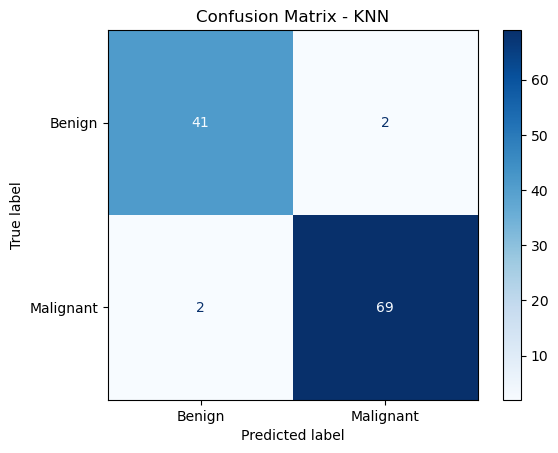

In [148]:
# Visualize the confusion matrix  
disp_knn = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels=['Benign', 'Malignant'])  
disp_knn.plot(cmap='Blues')  
plt.title("Confusion Matrix - KNN")  
plt.show()  

## Overview of Metrics

### 1. Accuracy: 0.9649

This means that 96.49% of the predictions made by the KNN model were correct. This is a good accuracy rate, implying the model performs well overal.


### 2. Precision:  0.9718


This indicates that of all the instances classified as malignant (class 1), approximately 97.18% were actually malignant. This means relatively few benign instances were misclassified as malignant, which is important in medical contexts.

### 3. Recall: 0.9718

This metric shows that 97.18% of all actual malignant cases were correctly identified by the KNN model. Like precision, this is crucial for ensuring that most patients with breast cancer are accurately diagnosed.

### 4. Confusion Matrix
[[41  2]  
 [ 2 69]
 * True Negatives (TN): 41 (correctly classified benign instances)
 * False Positives (FP): 2 (benign instances incorrectly classified as malignant)
 * False Negatives (FN): 2 (malignant instances incorrectly classified as benign)
 * True Positives (TP): 69 (correctly classified malignant instances)es)]

# 4. Model Comparison
Compare the performance of the five classification algorithms.
Which algorithm performed the best and which one performed the worst?

 * Logistic Regression and Decision Tree:
Both Logistic Regression and Decision Tree had identical metrics, with an accuracy of 94.74%, precision of 95.77%, and recall of 95.77%. These are commendable results but ranked them as the least effective models among those assessed. Their confusion matrices indicated similar types of misclassifications, and they lacked the performance edge seen in Random Forest, KNN, and especially SVM.

 * Random Forest:
The Random Forest classifier followed closely with an accuracy of 96.49%. It also showed good precision at 95.89% and high recall of 98.59%, meaning it missed very few actual malignant cases. The F1-score of approximately 0.9711 reflects a strong balance between precision and recall, making it a robust choice for the classification task. The confusion matrix showed that the model made a small number of false predictions, suggesting solid performance.

 * SVM (Support Vector Machine):
The SVM model performed the best among the five algorithms, achieving an impressive accuracy of 98.25%. It demonstrated exceptional ability to identify malignant cases with a perfect recall of 100%, meaning it correctly classified all actual malignant instances without any false negatives. The precision of 97.26% also indicates that most predictions of malignancy were accurate, leading to an overall high F1-score of 0.9861. This performance is particularly critical in a medical context, where missing a diagnosis can have serious repercussions.

 * KNN (k-Nearest Neighbors):
KNN showed similar results to Random Forest, with an accuracy of 96.49%. Its precision was slightly higher at 97.18%, and recall also stood at 97.18%, demonstrating that the model effectively identified both benign and malignant cases. The F1-score indicated a good performance, although it was not enough to surpass the Random Forest or SVM results.

## Analysis of Performance
### Best Performing Model:

SVM (Support Vector Machine) stands out as the best model based on its metrics:
Accuracy of 0.9825 indicates that the model correctly identifies a high proportion of instances.
Recall of 1.0000 demonstrates that it identifies all actual malignant cases without missing any (no false negatives).
F1-score of 0.9861 shows an excellent balance between precision and recall.

### Worst Performing Model:

Logistic Regression and Decision Tree exhibit the same performance metrics (since they yield similar outputs in this case):
Accuracy of 0.9474, Precision of 0.9577, and Recall of 0.9577 indicate they perform reasonably but poorly compared to the other algorithms.
They also share similar confusion matrices, showing modest misclassifications.
Additional Observations
Random Forest and KNN share similarly high accuracy (0.9649) and strong performance metrics, but still fall short compared to the SVM.
Overall, while all models perform well on the breast cancer classification task, the SVM provides the most reliable results, particularly important in a healthcare setting.